## Big Query Costs - Basic Carbitrage Processing

In [1]:
from google.cloud import bigquery
from google.api_core.exceptions import GoogleAPIError
import os

client = bigquery.Client(project="umt-msba")



In [2]:
# # Function to estimate query cost
# def estimate_query_cost(query):
#     try:
#         #dry_run=True: This configures the query to simulate execution without processing any data. 
#         # It returns metadata about the query, such as how much data it would scan.

#         #use_query_cache=False: This ensures the query doesn't use any cached results,
#         #meaning it will provide an accurate estimate of how much data would be processed.
#         job_config = bigquery.QueryJobConfig(dry_run=True, use_query_cache=False)
#         query_job = client.query(query, job_config=job_config)
#         bytes_processed = query_job.total_bytes_processed
#         cost = (bytes_processed / (1024 ** 4)) * 5  # Cost is $5 per TB
#         return bytes_processed, cost
#     except GoogleAPIError as e:
#         print(f"Error estimating query cost: {e}")
#         return None, None


In [11]:
# Function to run a query
def run_query(query):
    try:
        query_job = client.query(query)
        results = query_job.result()

        bytes_processed = query_job.total_bytes_processed
        mb_processed = bytes_processed / (1024 ** 2)
        cost_per_tb = 5.0


        tb_processed = bytes_processed / (1024 ** 4)  # Convert bytes to terabytes
        estimated_cost = tb_processed * cost_per_tb

        # Display the processed data and estimated cost
        print(f"Data processed: {mb_processed:.2f} MB")
        

        print(f"Estimated bytes processed: {bytes_processed}")
        print(f"Estimated cost: ${estimated_cost:.5f}\n\n")

        print(f"Estimated bytes processed against a full year of data: {bytes_processed*50}")
        print(f"Estimated cost against a full year of data: ${estimated_cost*50:.20f}")
        print(f"Estimated cost against a full year of data every 6 hours: ${(estimated_cost*50)*(4*365):.20f}")

        

        return results
    except GoogleAPIError as e:
        print(f"Error running query: {e}")
        return None

In [ ]:
# Main logic - Template

# query = """
# SELECT name, SUM(number) as total
# FROM `bigquery-public-data.usa_names.usa_1910_2013`
# WHERE state = 'TX'
# GROUP BY name
# ORDER BY total DESC
# LIMIT 10
# """

# Estimate query cost
# bytes_processed, cost = estimate_query_cost(query)
# if bytes_processed and cost:
#     print(f"Estimated bytes processed: {bytes_processed}")
#     print(f"Estimated cost: ${cost:.2f}")

# # Run the query and display results
# results = run_query(query)
# if results:
#     for row in results:
#         print(f"name: {row.name}, total: {row.total}")


Co-pilot and ChatGPT were used to help make this code.

ChatGPT Prompt:

https://chatgpt.com/share/66e9d0b2-7888-8000-9fd8-b5d3883cb5ea

## Queries

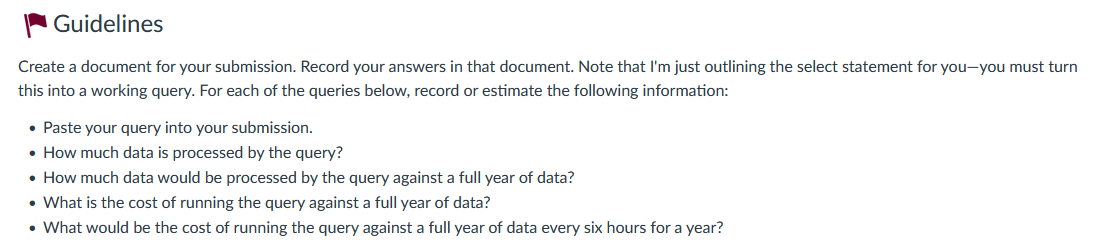

The data is from the dates 9-6-2024 to 9-13-2024; this is roughly 2% of a year.

### Query 1: 'SELECT COUNT(*)'

In [12]:
# Main logic - Template

count_table_query = """
SELECT COUNT(*) as total
FROM `umt-msba.carbitrage.raw_listing_pages_50K_20240913`
"""



# Run the query and display results
results = run_query(count_table_query)
if results:
    for row in results:
        print(f" Total Count: {row.total}")


Data processed: 0.00 MB
Estimated bytes processed: 0
Estimated cost: $0.00000


Estimated bytes processed against a full year of data: 0
Estimated cost against a full year of data: $0.00000000000000000000
Estimated cost against a full year of data every 6 hours: $0.00000000000000000000
 Total Count: 50000


In [8]:
# Estimate query cost
bytes_processed, cost = estimate_query_cost(count_table_query)

print(f"Estimated bytes processed: {bytes_processed}")
print(f"Estimated bytes processed against a full year of data: {bytes_processed*50}")
print(f"Estimated cost: ${cost:.2f}")
print(f"Estimated cost for a year: ${cost*50:.10f}")
print(f"Estimated cost for a year: ${(cost*50)*(4*365):.10f}")

Estimated bytes processed: 0
Estimated bytes processed against a full year of data: 0
Estimated cost: $0.00
Estimated cost for a year: $0.0000000000
Estimated cost for a year: $0.0000000000


In [ ]:
bytes_processed = results.total_bytes_processed

### Query 2: 'SELECT location, COUNT(*)'

### Query 3: 'SELECT url, location'

### Query 4: 'SELECT url, raw_html, location' from "missoula" 

### Additional Questions




#### 1. What types of queries appear to be driving the costs?

#### 2. How would you recommend structuring the project to keep costs down? 